In [11]:
import pandas as pd
from sklearn.metrics import precision_score,recall_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
############No need to run these codes now ############################

In [98]:
presultsOurYeast1=pd.read_csv("./results/tesryeast1.txt",header =None)

In [99]:
presultsOurYeast0=pd.read_csv("./results/tesryeast0.txt",header =None)

In [11]:
presultsOurYeast1

,0,1,2,3
0,560,0.01,0.66,0.40
1,561,0.00,0.97,0.13
2,562,0.00,0.43,0.79
3,563,0.01,0.00,0.05
4,564,0.00,0.79,0.47
...,...,...,...,...
995,835,0.00,0.35,0.35
996,836,0.00,0.16,0.95
997,837,0.00,0.75,0.78
998,838,0.00,0.63,0.98


In [100]:
presultsOurYeast1.loc[:,0]=1 #labelling it as gnd truth 1 

In [101]:
presultsOurYeast0.loc[:,0]=0  #labelling it as gnd truth 0

In [102]:
presultsOurYeast=pd.concat([presultsOurYeast1,presultsOurYeast0],ignore_index=True)

In [21]:
#presultsOurYeast['results']=presultsOurYeast.apply (lambda row: 1 if max(row[1],row[2],row[3]) <0.05   else 0, axis=1)

In [103]:
presultsOurYeast.columns = ['GroundTruth','p_L->A', 'p_L->B', 'diff(B|A,B|A,L)']#, 'final_call']

In [104]:
presultsOurYeast

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.01,0.66,0.40
1,1,0.00,0.97,0.13
2,1,0.00,0.43,0.79
3,1,0.01,0.00,0.05
4,1,0.00,0.79,0.47
...,...,...,...,...
1995,0,0.00,0.45,0.99
1996,0,0.00,0.35,0.00
1997,0,0.00,0.27,0.79
1998,0,0.00,0.05,0.84


In [105]:
#presultsOurYeast.to_csv("YeastbothresultsOurmethod.csv",index=False)

In [106]:
test=pd.read_csv("YeastbothresultsOurmethod.csv")

In [107]:
test

,GroundTruth,p_L->A,p_L->B,"diff(B|A,B|A,L)"
0,1,0.01,0.66,0.40
1,1,0.00,0.97,0.13
2,1,0.00,0.43,0.79
3,1,0.01,0.00,0.05
4,1,0.00,0.79,0.47
...,...,...,...,...
1995,0,0.00,0.45,0.99
1996,0,0.00,0.35,0.00
1997,0,0.00,0.27,0.79
1998,0,0.00,0.05,0.84


In [108]:
citresultsyeast1= pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_yeast1.csv")

In [109]:
citresultsyeast1.loc[:,'p_res']=1

In [84]:
citresultsyeast1

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.999997,0.526752,1.451417e-42,3.025060e-13,9.999967e-01,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,6.540438e-01,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,1.602582e-01,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,7.355318e-01,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,9.999919e-01,1
...,...,...,...,...,...,...
995,0.446991,0.446991,3.314259e-02,1.001815e-33,5.616536e-03,1
996,1.000000,0.098119,1.292501e-35,4.584613e-105,1.000000e+00,1
997,1.000000,0.198089,1.313946e-17,1.406160e-06,1.000000e+00,1
998,0.041694,0.041694,3.839916e-02,5.016144e-26,3.906200e-02,1


In [110]:
citresultsyeast0= pd.read_csv("../LinearDifferentvalues/CIT_testing/results_cit_yeast0.csv")

In [111]:
citresultsyeast0.loc[:,'p_res']=0

In [112]:
citresultsyeast=pd.concat([citresultsyeast1,citresultsyeast0],ignore_index=True)

In [113]:
citresultsyeast

,p_cit,p_TL,p_TG,p_GL,p_Lind,p_res
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [114]:
citresultsyeast.rename(columns={'p_res':'GroundTruth'},inplace=True)

In [115]:
#citresultsyeast.to_csv("YeastbothresultsCIT.csv",index=False)

In [116]:
test=pd.read_csv("YeastbothresultsCIT.csv")

In [117]:
test

,p_cit,p_TL,p_TG,p_GL,p_Lind,GroundTruth
0,0.999997,0.526752,1.451417e-42,3.025060e-13,0.999997,1
1,0.770998,0.770998,3.154449e-05,4.327071e-06,0.654044,1
2,0.160258,0.013723,1.478439e-01,2.326003e-04,0.160258,1
3,0.864296,0.304704,8.642960e-01,2.939863e-71,0.735532,1
4,0.999992,0.797223,4.165822e-12,2.051547e-34,0.999992,1
...,...,...,...,...,...,...
1995,1.000000,0.044756,4.255630e-08,3.497283e-07,1.000000,0
1996,0.923909,0.116567,1.282423e-01,5.183201e-60,0.923909,0
1997,1.000000,0.246241,1.240799e-121,4.313804e-87,1.000000,0
1998,1.000000,0.767710,1.409244e-20,9.823368e-59,1.000000,0


In [ ]:
######## Run it from here ###########

In [4]:
cit=pd.read_csv("YeastbothresultsCIT.csv")
ourmethod=pd.read_csv("YeastbothresultsOurmethod.csv")

In [5]:
kvalues=np.linspace(0,1,108)

In [6]:
kvalues

array([0.        , 0.00934579, 0.01869159, 0.02803738, 0.03738318,
       0.04672897, 0.05607477, 0.06542056, 0.07476636, 0.08411215,
       0.09345794, 0.10280374, 0.11214953, 0.12149533, 0.13084112,
       0.14018692, 0.14953271, 0.1588785 , 0.1682243 , 0.17757009,
       0.18691589, 0.19626168, 0.20560748, 0.21495327, 0.22429907,
       0.23364486, 0.24299065, 0.25233645, 0.26168224, 0.27102804,
       0.28037383, 0.28971963, 0.29906542, 0.30841121, 0.31775701,
       0.3271028 , 0.3364486 , 0.34579439, 0.35514019, 0.36448598,
       0.37383178, 0.38317757, 0.39252336, 0.40186916, 0.41121495,
       0.42056075, 0.42990654, 0.43925234, 0.44859813, 0.45794393,
       0.46728972, 0.47663551, 0.48598131, 0.4953271 , 0.5046729 ,
       0.51401869, 0.52336449, 0.53271028, 0.54205607, 0.55140187,
       0.56074766, 0.57009346, 0.57943925, 0.58878505, 0.59813084,
       0.60747664, 0.61682243, 0.62616822, 0.63551402, 0.64485981,
       0.65420561, 0.6635514 , 0.6728972 , 0.68224299, 0.69158

In [7]:
def plot_pr(path,kvalues,cit=False):
    precision=[]
    recall=[]
    for i in kvalues:
        data=pd.read_csv(path)
        if(cit==False):
            data['results']=data.apply (lambda row: 1 if max(row[1],row[2],row[3]) <i   else 0, axis=1)
        else:
            data['results']=data.apply (lambda row: 1 if row[0] <i   else 0, axis=1)
        precision.append(precision_score(data['GroundTruth'],data['results']))
        recall.append(recall_score(data['GroundTruth'],data['results']))
    zipped=zip(precision,recall)
    z=sorted(zipped, key = lambda t: t[1])
    precision,recall=zip(*z)
    return [recall,precision]

In [16]:
x_our,y_our=plot_pr("YeastbothresultsOurmethod.csv",kvalues)
aupr_our=metrics.auc(x_our,y_our)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
x_cit,y_cit=plot_pr("YeastbothresultsCIT.csv",kvalues,True)
aupr_cit=metrics.auc(x_cit,y_cit)

/home/aravind/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUPR for our method 0.4659589935335641
AUPR for CIT 0.43304075402951364


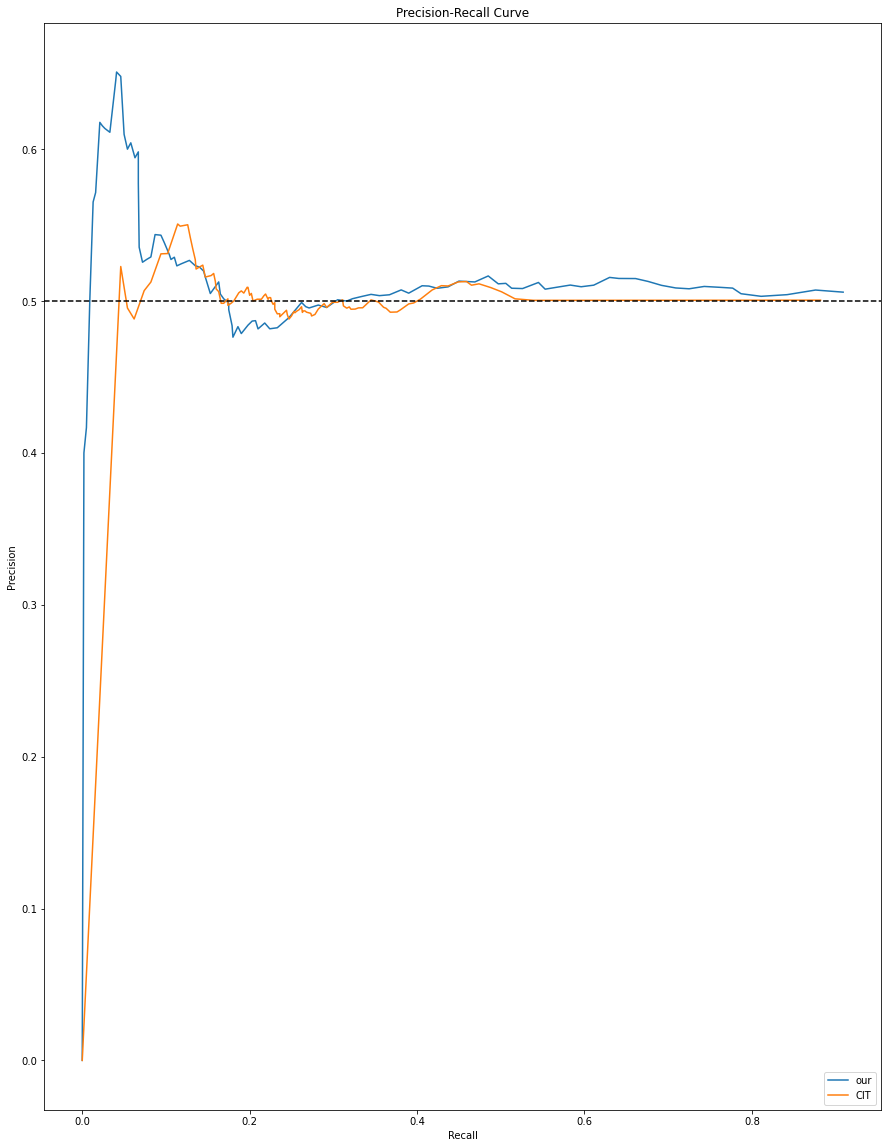

In [17]:
plt.figure(figsize=(15,20))
plt.plot(x_our,y_our,label="our")
plt.plot(x_cit,y_cit,label="CIT")
plt.axhline(y=0.5, color='k', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
print("AUPR for our method",aupr_our)
print("AUPR for CIT",aupr_cit)
plt.show()

In [12]:
metrics.auc(x_our,y_our)

0.4659589935335641

In [13]:
metrics.auc(x_cit,y_cit)

0.43304075402951364